In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

from scipy.spatial import distance
from scipy.optimize import linear_sum_assignment
from skimage.measure import label, regionprops


In [407]:
IMG_SHAPE = (500,500)

def random_points(img):

    width, height = img.shape[:2]
    
    
    p1 = np.random.randint(-100, 100)
    p2 = np.random.randint(-50, 50)
    p3 = np.random.randint(-20, 20)
    p4 = np.random.randint(-20, 100)
    
    return np.float32([[p1, p2], [width+p1, p3], [p1, height+p1], [width+p3, height+p2]])

def deformate(img):
    
    pts2 = random_points(img)
    pts1 = np.float32([[0, 0], [img.shape[0], 0], [0, img.shape[1]], [img.shape[0], img.shape[1]]])
    

    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(img, matrix, (IMG_SHAPE[1], IMG_SHAPE[0]))
    
    return matrix, result
   # result = cv2.warpPerspective(img, matrix, (phone_split.shape[1], phone_split.shape[0]))
    

    
def generate_stars(count = 100):
    img = np.zeros(IMG_SHAPE)
    c = 0
    mask = np.random.randint(0,IMG_SHAPE[0],(count,2))
    count_of = 0
    for coord in coords:
        if np.sum(img[coord[0]-2:coord[0]+2, 
              coord[1]-2:coord[1]+2]) == 0:
            img[coord[0]-1:coord[0]+1,coord[1]-1:coord[1]+1] = 1
            count_of+=1
    return img, mask,count_of

def image_from_coords(coords):
#     coords_min = ((min(coords[:,0]), min(coords[:,1])))
#     coords[0]+=abs(coords_min[0])
#     coords[1]+=abs(coords_min[1])
    img = np.zeros((max(coords[:,0])+5, max(coords[:,1])+5))
    for coord in coords:
        if np.sum(img[coord[0]-2:coord[0]+2, 
              coord[1]-2:coord[1]+2]) == 0:
            img[coord[0]-1:coord[0]+1,coord[1]-1:coord[1]+1] = 1
    return img, coords
    
    

100


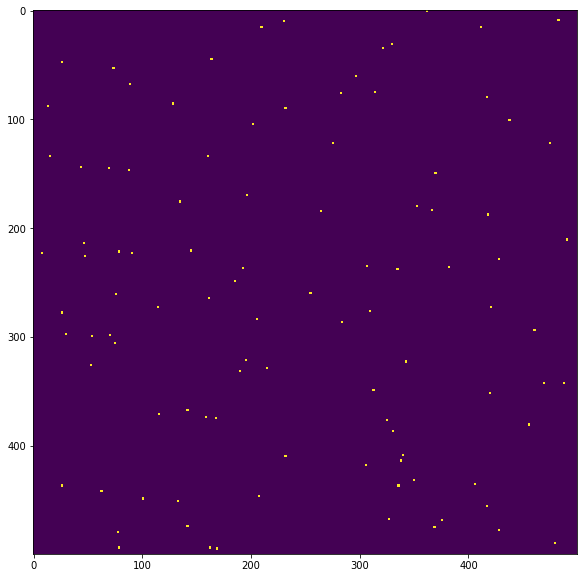

In [408]:
img, coords, count = generate_stars(count = 100)
coords_new = np.append(coords, np.ones((len(coords),1)), axis = 1)

plt.figure(figsize = (10,10))
print(count)
plt.imshow(img)

In [409]:
M, dimg = deformate(img)
M = np.asmatrix(M)
# plt.figure(figsize = (10,10))
# plt.imshow(dimg)

In [410]:
coords_new = np.append(coords, np.ones((len(coords),1)), axis = 1)
new_points = M*coords_new.transpose(1,0)
new_points = np.asarray(new_points.transpose(1,0).astype(int))

In [452]:
i = 0

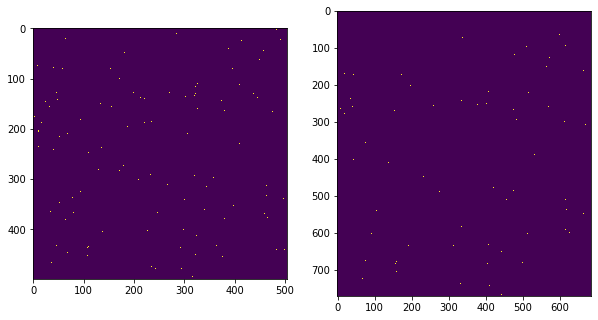

In [462]:
img, coords, count = generate_stars(count = 100)
coords_new = np.append(coords, np.ones((len(coords),1)), axis = 1)

M, dimg = deformate(img)
M = np.asmatrix(M)

new_points = M*coords_new.transpose(1,0)
new_points = np.asarray(new_points.transpose(1,0).astype(int))


deform_img, c = image_from_coords(new_points)
old_img, c =  image_from_coords(coords)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(old_img)
plt.subplot(1,2,2)
plt.imshow(deform_img)
plt.show()


coords_str = str(coords[:,:2].tolist())
catalog = new_points.copy()
indices = list(range(0, len(catalog)))
np.random.shuffle(indices)
catalog = catalog[indices]

catalog_str = str(catalog[:,:2].tolist())
answer_str = str(new_points[:,:2].tolist())

task = coords_str+"\n"+catalog_str

with open(path+"task%d.txt"%i, 'w') as f:
    f.write(task)
with open(path+"answer%d.txt"%i, 'w') as f:
    f.write(answer_str)

i+=1

In [262]:
def docluster(img, start, end, p = 10):
    X = np.random.randint(start[0], end[0], p)
    Y = np.random.randint(start[1], end[1], p)
    
    w = max(X)-min(X)
    h = max(Y)-min(Y)
    for x,y in zip(X,Y):
        img[x-1:x+1,y-1:y+1] = 1
    return img, w*h

def culstering():
    img = np.zeros(IMG_SHAPE)
    count_of_clusters = np.random.randint(4,8)
    print(count_of_clusters)
    t = IMG_SHAPE[0]//count_of_clusters//2
    e= IMG_SHAPE[1]//count_of_clusters+20
    areas = []
    count = []
    for _ in range(count_of_clusters):
        i, j = np.random.randint(0, count_of_clusters, 2)
        i*=2
        j*=2
        print(i, j)
        x_s = np.random.randint(i*t, i*t+60)
        y_s = np.random.randint(j*t, j*t+60)
        
        x_e = np.random.randint(i*t+60, i*t+80)
        y_e = np.random.randint(j*t+60, j*t+80)
        img, area = docluster(img, (x_s, y_s), (x_e, y_e), p = 40)
        areas.append(area)
        
    return img, count_of_clusters, areas
        
        

In [439]:
path

'tasks/3/'

6
2 2
4 6
0 2
8 10
6 4
6 8
[1475, 660, 792, 308, 140, 2640]
6


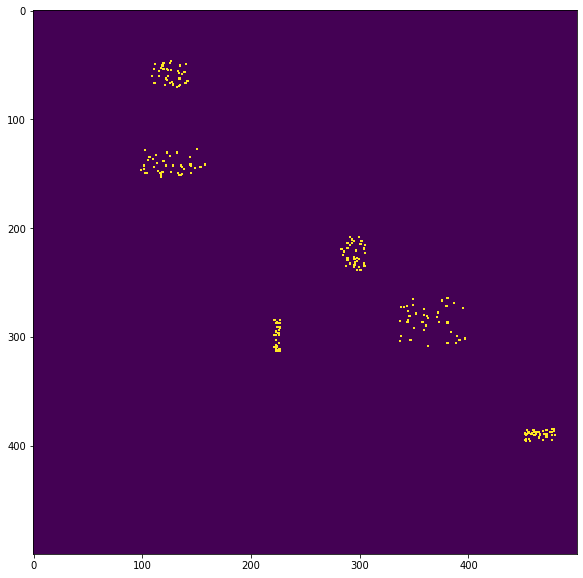

In [266]:

plt.figure(figsize = (10,10))


im, cl, areas = culstering()
plt.imshow(im)
print(areas)
print(cl)

### Задания и ответы

In [179]:
#1 посчитайте количество звезд

In [190]:
import pickle

path = "tasks/1/"
answers = []
for i in range(10):
    img, coords, count = generate_stars(count = 100)
    img*=255
    name = path + str(i) + ".png"
    cv2.imwrite(name, img)
    answers.append(count)
with open(path+'answer.pickle', 'wb') as f:
    pickle.dump(answers, f)

In [ ]:
#2 определите количество кластеров и их площадь

6
2 8
2 0
4 10
6 4
6 6
2 10


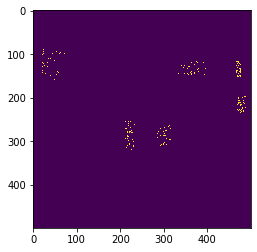

In [327]:
path = "tasks/2/"

im, cl, areas = culstering()
plt.imshow(im)

In [298]:
i = 0

In [328]:
name = path + str(i) + ".png"
cv2.imwrite(name, im*255)
answer = [cl] + sorted(list(areas))
answer_str = str(answer)
print(answer)
with open(path+"answe%d.txt"%i, 'w') as f:
        f.write(answer_str)
i+=1

[6, 350, 666, 1260, 1350, 1860, 3519]


In [329]:
i


10

In [191]:
#3 сопоставьте звезды между собой  ОКРУГЛЕНИЕ ЧЕРЕЗ INT

In [406]:
path = "tasks/3/"
answers = []
tasks = []
for i in range(10):
    img, coords, count = generate_stars(count = 100)
    M, dimg = deformate(img)
    M = np.asmatrix(M)
    matrix_coord = np.append(coords, np.ones((len(coords),1)), axis = 1)
    matrix_coord = M*coords_new.transpose(1,0)
    answer = np.asarray(matrix_coord.transpose(1,0).astype(int))
    answer_str = str(answer[:,:2].tolist())
    to_task = answer[:,:2]
    np.random.shuffle(to_task)
    
    coords_str = str(coords.tolist())
    to_task_str = str(to_task.tolist())
    
    task = coords_str+"\n"+to_task_str
    
    with open(path+"task%d.txt"%i, 'w') as f:
        f.write(task)
    with open(path+"answe%d.txt"%i, 'w') as f:
        f.write(answer_str)
#     name = path + str(i) + ".png"
#     cv2.imwrite(name, img)
#     answers.append(count)

In [330]:
#4 маска хомографии

In [401]:
M, mask = cv2.findHomography( answer[:,:2], coords, cv2.RANSAC,5.0)

In [402]:
M = np.matrix(M)

In [403]:
coords

array([[ 60,  78],
       [420,  17],
       [427, 101],
       [448, 177],
       [332,  32],
       [335,  20],
       [ 76, 228],
       [160, 106],
       [499, 454],
       [ 26, 496],
       [106, 348],
       [ 77, 446],
       [345, 147],
       [418,  80],
       [ 50, 278],
       [283,  86],
       [260, 121],
       [363, 220],
       [249,  91],
       [ 16,  35],
       [162, 471],
       [199, 250],
       [191,  78],
       [218, 325],
       [  8,   0],
       [ 49, 275],
       [ 38,  82],
       [203, 121],
       [298, 419],
       [ 95, 259],
       [193, 242],
       [450, 441],
       [149,  36],
       [261, 153],
       [327, 106],
       [325, 440],
       [ 64, 492],
       [189,  20],
       [163, 194],
       [252, 499],
       [348, 339],
       [199,  73],
       [284, 250],
       [498,  72],
       [112, 206],
       [296,  71],
       [ 32, 263],
       [444, 264],
       [ 29, 484],
       [135, 373],
       [327, 408],
       [341, 104],
       [246,

In [404]:
np.asarray((M*answer.transpose(1,0)).transpose(1,0)).astype(int)

array([[ 24,  -8,   0],
       [ 73, 190,   0],
       [ 48,  62,   0],
       [ 58, 167,   0],
       [ 70, 159,   0],
       [ 51,  87,   0],
       [ 10, -63,   0],
       [ 58, 188,   0],
       [ 21,  39,   0],
       [ 70, 198,   0],
       [ 52, 173,   0],
       [ 59, 162,   0],
       [ 45, 107,   0],
       [ 34,  51,   0],
       [ 68, 148,   0],
       [ 77, 194,   0],
       [ 99, 362,   0],
       [ 82, 216,   0],
       [ 14, -60,   0],
       [ 62, 136,   0],
       [ 99, 288,   0],
       [ 16, -56,   0],
       [ 19, -12,   0],
       [ 24,  20,   0],
       [ 62, 129,   0],
       [ 81, 220,   0],
       [101, 314,   0],
       [ 99, 296,   0],
       [ 45,  63,   0],
       [ 38,  81,   0],
       [  7, -29,   0],
       [101, 359,   0],
       [ 34,  45,   0],
       [ 95, 338,   0],
       [ 13,   8,   0],
       [101, 364,   0],
       [ 57, 165,   0],
       [ 21,  26,   0],
       [ 73, 184,   0],
       [ 84, 273,   0],
       [ 69, 182,   0],
       [ 55, 173

In [405]:
to_task

array([[827, 559],
       [427, 559],
       [668, 774],
       [498, 235],
       [478, 723],
       [626, 663],
       [937, 568],
       [471,  49],
       [769,  48],
       [424, 384],
       [504,  -3],
       [502, 311],
       [614, 292],
       [718, 413],
       [497, 749],
       [413, 640],
       [127, -16],
       [369, 653],
       [924, 666],
       [530, 630],
       [227, 597],
       [912, 701],
       [844, 431],
       [787, 310],
       [538, 703],
       [366, 574],
       [188, 445],
       [215, 557],
       [675, 658],
       [667, 287],
       [900, 150],
       [124,  98],
       [726, 454],
       [168,  66],
       [831,  62],
       [117,  47],
       [504, 216],
       [787, 170],
       [435, 611],
       [286, 225],
       [450, 466],
       [498,  94],
       [866, 183],
       [769, 194],
       [364,   0],
       [730, 156],
       [193, 683],
       [693,  49],
       [720, 478],
       [132, 493],
       [128, 350],
       [313,  28],
       [434,